In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('./preprocess.csv')

In [3]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat_10_Score,Sex,Ethnicity,Jaundice,class
0,0,0,0,0,0,0,1,1,0,1,3,0,8,1,0
1,1,1,0,0,0,1,1,0,0,0,4,1,5,1,1
2,1,0,0,0,0,0,1,1,0,1,4,1,8,1,1
3,1,1,1,1,1,1,1,1,1,1,10,1,0,0,1
4,1,1,0,1,1,1,1,1,1,1,9,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,1,0,5,0,0
1050,0,0,1,1,1,0,1,0,1,0,5,1,7,1,1
1051,1,0,1,1,1,1,1,1,1,1,9,1,8,1,1
1052,1,0,0,0,0,0,0,1,0,1,3,1,5,0,0


In [4]:
data['class'].value_counts()

1    728
0    326
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

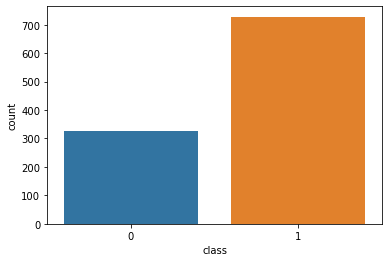

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='class',data=data)

In [6]:
X=data.drop(columns='class')
Y=data['class']

In [7]:
X.shape

(1054, 14)

In [8]:
Y.shape

(1054,)

In [9]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek()
X_bal, Y_bal = sm.fit_resample(X, Y)

In [10]:
!pip install imbalanced-learn


In [11]:
X_bal.shape

(1456, 14)

In [12]:
Y_bal.shape

(1456,)

<AxesSubplot:xlabel='class', ylabel='count'>

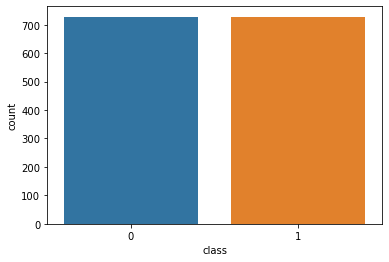

In [13]:
import seaborn as sns
sns.countplot(x=Y_bal,data=data)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_bal, Y_bal, test_size=0.15, random_state=111)

In [15]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(1237, 14)
(219, 14)
(1237,)
(219,)


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [17]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train,Y_train)
LR=lrc.score(X_train,Y_train)
test_accuracy = lrc.score(X_bal, Y_bal)
print('Score:{}'.format(test_accuracy))


Score:1.0


Confusion Matrix
[[728   0]
 [  0 728]]


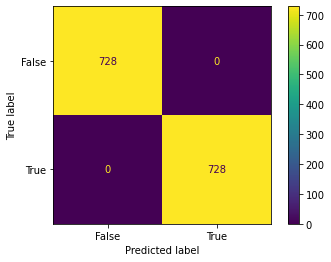

In [18]:
Y_pred = lrc.predict(X_bal)
confusion_mat = confusion_matrix(Y_bal,Y_pred)
print("Confusion Matrix")
print(confusion_mat)
trsc = accuracy_score(Y_bal,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [19]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train,Y_train)
MNB=mnb.score(X_train,Y_train)
test_accuracy = mnb.score(X_bal, Y_bal)
print('Score:{}'.format(test_accuracy))

Score:0.9217032967032966


Confusion Matrix
[[637  91]
 [ 23 705]]


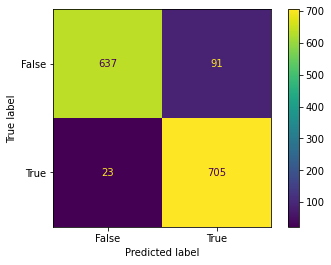

In [20]:
Y_pred = mnb.predict(X_bal)
confusion_mat = confusion_matrix(Y_bal,Y_pred)
print("Confusion Matrix")
print(confusion_mat)
trsc = accuracy_score(Y_bal,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [21]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train,Y_train)
SVC=svc.score(X_train,Y_train)
test_accuracy = svc.score(X_bal, Y_bal)
print('Score:{}'.format(test_accuracy))

Score:0.35302197802197804


Confusion Matrix
[[484 244]
 [698  30]]


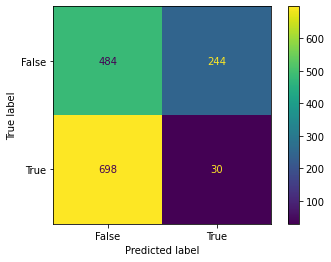

In [22]:
Y_pred = svc.predict(X_bal)
confusion_mat = confusion_matrix(Y_bal,Y_pred)
print("Confusion Matrix")
print(confusion_mat)
trsc = accuracy_score(Y_bal,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

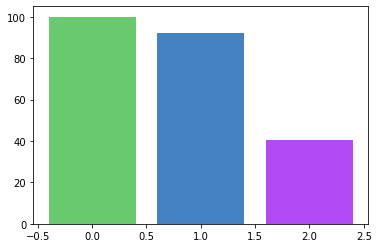

In [27]:
lr=LR*100
mnb=MNB*100
svc=SVC*100
height=[lr,mnb,svc]
bars=['logistic','MultinomialNB','svc']
x_pos=np.arange(len(bars))
plt.bar(x_pos, height, color=['#69C96E', '#4482C1', '#B24BF3'])
plt.show


In [28]:
import joblib

In [29]:
joblib.dump(lrc,'./model.jlb')

['./model.jlb']